In [35]:
import pandas as pd
import seaborn as sns

df = pd.read_csv('/Users/henrysun_1/Desktop/Duke/2024-2025/Summer 2024/fishics/data/ctd/2024-02_data_all_exo.csv')
df = df[df['station'] < 32]

data = pd.read_csv("/Users/henrysun_1/Desktop/Duke/2024-2025/Summer 2024/fishics/data/data_for_henry_2024.csv")
data = data[data['date'] == '2/1/24']

# data
df3 = df[df['station'] == 3]
df3
'''
TODO: get first and last values for temperature and salinity with respect to depth. 
then add as variable surf_temp, bot_temp, surf_salt, bot_salt and calculate stratification
'''


,Unnamed: 0,date,GPS.Latitude..,GPS.Longitude..,station,Depth.m,Sal.psu,Temp..C,pH,ODO.mg.L,Turbidity.FNU,Chlorophyll.RFU
410,411,2024-02-10 11:25:01,39.182897,-74.204214,3,1.625714,19.924286,7.207000,7.894286,9.287143,1.908571,0.985714
411,412,2024-02-10 11:25:01,39.182899,-74.204229,3,2.765400,21.716000,7.188100,7.896000,9.237000,1.999000,0.992000
412,413,2024-02-10 11:25:01,39.182900,-74.204236,3,5.225214,21.926429,7.078357,7.888571,9.309286,1.732143,0.997143
413,414,2024-02-10 11:25:01,39.182896,-74.204234,3,6.694900,22.101000,6.917000,7.883000,9.383000,0.859000,0.914000
414,415,2024-02-10 11:25:01,39.182906,-74.204219,3,9.161929,22.219286,6.874500,7.874286,9.414286,-0.185714,0.894286
415,416,2024-02-10 11:25:01,39.182902,-74.204204,3,11.332400,22.271000,6.919100,7.866000,9.421000,-0.221000,0.975000
416,417,2024-02-10 11:25:01,39.182894,-74.204263,3,12.883692,22.279231,6.874231,7.876923,9.509231,-0.251538,0.988462
417,418,2024-02-10 11:25:01,39.182894,-74.204216,3,15.087625,22.341875,6.960875,7.860000,9.447500,-0.080625,1.135625
418,419,2024-02-10 11:25:01,39.182910,-74.204200,3,17.064250,22.357500,7.007625,7.852500,9.395000,0.203750,1.208750
419,420,2024-02-10 11:25:01,39.182886,-74.204246,3,18.985231,22.357692,6.984000,7.856154,9.460000,0.041538,1.180000


In [36]:
merged_df = pd.merge(df, data, on='station')
# merged_df

<AxesSubplot:xlabel='tSNE1', ylabel='tSNE2'>

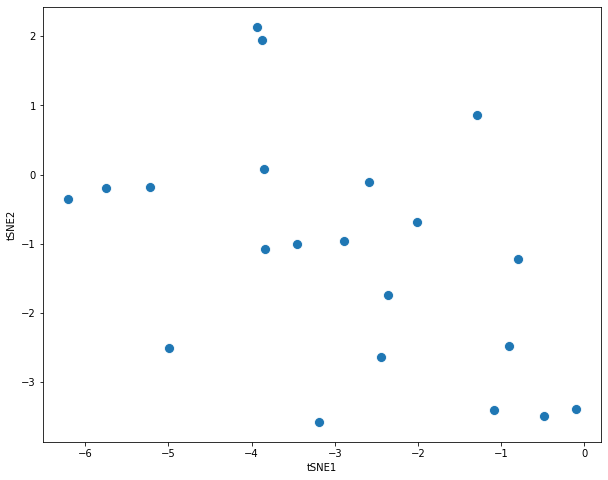

In [20]:
fish_asvs = merged_df.iloc[:, 22:]
## Drop duplicate values. Build ML model
fish_asvs = fish_asvs.drop_duplicates()
fish_asvs

from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=30, perplexity=10, learning_rate=10, n_iter=1000) #test with diff perplexity
tsne_result = tsne.fit_transform(fish_asvs)
# Perform t-SNE

# Add t-SNE results to the dataframe
fish_asvs['tSNE1'] = tsne_result[:, 0]
fish_asvs['tSNE2'] = tsne_result[:, 1]
fish_asvs

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.scatterplot(x='tSNE1', y='tSNE2', data=fish_asvs, s=100, palette='tab10')


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

# fish_asvs.describe()

,Atl_croaker_(nibea98),Bay_anchovy,Black_drum_or_Spot,Black_sea_bass,Brd_striped_anchovy,Little_tunny_or_skipjack_tuna,Nor_sea_robin,Scup,Smallmouth_flounder,Southern_kingfish(nibea95),...,Am_gizzard_shad,Fourspine_stickleback,Catfish_sp,White_perch,Whitefish_Cor,Pac_sand_lance,White_catfish,Atl_salmon,tSNE1,tSNE2
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.0,21.000000,21.000000,21.000000,21.000000,...,21.000000,21.000000,21.0,21.0,21.0,21.0,21.0,21.0,21.000000,21.000000
mean,0.002313,0.047169,0.005456,0.000826,0.000306,0.0,0.006207,0.003637,0.022352,0.001628,...,0.000205,0.000350,0.0,0.0,0.0,0.0,0.0,0.0,-2.918480,-1.141881
std,0.005359,0.067076,0.006749,0.002448,0.001404,0.0,0.011250,0.006509,0.031312,0.003189,...,0.000939,0.001604,0.0,0.0,0.0,0.0,0.0,0.0,1.764609,1.695123
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,-6.203511,-3.579545
25%,0.000000,0.009734,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,-3.875793,-2.501976
50%,0.000000,0.021126,0.003974,0.000000,0.000000,0.0,0.000783,0.000000,0.015334,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,-2.889668,-1.001553
75%,0.000000,0.051945,0.009373,0.000065,0.000000,0.0,0.006187,0.002279,0.033119,0.000402,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,-1.296276,-0.177714
max,0.018294,0.240067,0.025096,0.010783,0.006435,0.0,0.044081,0.017572,0.141404,0.009848,...,0.004303,0.007350,0.0,0.0,0.0,0.0,0.0,0.0,-0.105286,2.137746
